In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud
import squarify

In [2]:
df_inc = pd.read_csv("E:/Python/Project_Python/INCIDENT.csv")
df_inc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2061 entries, 0 to 2060
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Incident_ID         2061 non-null   object
 1   Sources             2061 non-null   object
 2   Number_News         686 non-null    object
 3   Media_Attention     725 non-null    object
 4   Reliability         2061 non-null   int64 
 5   Date                2061 non-null   object
 6   Quarter             2050 non-null   object
 7   School              2060 non-null   object
 8   City                2061 non-null   object
 9   State               2061 non-null   object
 10  School_Level        2037 non-null   object
 11  Location            2058 non-null   object
 12  Location_Type       2056 non-null   object
 13  During_School       2039 non-null   object
 14  Time_Period         1897 non-null   object
 15  First_Shot          1586 non-null   object
 16  Summary             2061

In [3]:
df_inc.isnull().sum()

Incident_ID              0
Sources                  0
Number_News           1375
Media_Attention       1336
Reliability              0
Date                     0
Quarter                 11
School                   1
City                     0
State                    0
School_Level            24
Location                 3
Location_Type            5
During_School           22
Time_Period            164
First_Shot             475
Summary                  0
Narrative               15
Situation              160
Targets                304
Accomplice             296
Hostages                13
Barricade               13
Officer_Involved         7
Bullied                308
Domestic_Violence      155
Gang_Related           417
Preplanned              89
Shots_Fired            659
Active_Shooter_FBI     973
dtype: int64

In [4]:
df_inct= df_inc.drop_duplicates(keep = 'first')
del_inc=['Number_News', 'Sources', 'Media_Attention', 'School']
df_incident=df_inct.drop(del_inc, axis=1)
df_incident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2061 entries, 0 to 2060
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Incident_ID         2061 non-null   object
 1   Reliability         2061 non-null   int64 
 2   Date                2061 non-null   object
 3   Quarter             2050 non-null   object
 4   City                2061 non-null   object
 5   State               2061 non-null   object
 6   School_Level        2037 non-null   object
 7   Location            2058 non-null   object
 8   Location_Type       2056 non-null   object
 9   During_School       2039 non-null   object
 10  Time_Period         1897 non-null   object
 11  First_Shot          1586 non-null   object
 12  Summary             2061 non-null   object
 13  Narrative           2046 non-null   object
 14  Situation           1901 non-null   object
 15  Targets             1757 non-null   object
 16  Accomplice          1765

In [5]:
pd.set_option("display.max_columns", None)
df_incident.head()

Incident_ID  Reliability        Date Quarter         City State  \
0  20220601CAULL            4  01-06-2022  Summer  Los Angeles    CA   
1  20220531LAMON            4  31-05-2022  Spring  New Orleans    LA   
2  20220530CAHEL            4  30-05-2022  Spring      La Mesa    CA   
3  20220529ILDAC            4  29-05-2022  Spring      Chicago    IL   
4  20220526SCMEG            4  26-05-2022  Spring  Goose Creek    SC   

  School_Level             Location               Location_Type During_School  \
0         High      Front of School  Outside on School Property           Yes   
1         High  Off School Property         Off School Property           Yes   
2         High          Parking Lot  Outside on School Property            No   
3   Elementary      Front of School  Outside on School Property            No   
4          K-8          Parking Lot  Outside on School Property            No   

   Time_Period First_Shot                                            Summary  \
0    Dismissal   15:25:00       Student shot in front of school at dismissal   
1  Sport Event   11:45:00     3 people shot following high school graduation   
2      Evening   18:20:00               Adult man shot in school parking lot   
3        Night   01:30:00  5 wounded when 97 shots fired in front of school.   
4        Night   00:05:00  Man fatally shot in parking lot, found by staf...   

                                           Narrative              Situation  \
0  16-year-olds student was shot in front of the ...  Escalation of Dispute   
1  An 80-year-old woman was killed and two men we...  Escalation of Dispute   
2  Adult man was shot in the school parking lot. ...                    NaN   
3  5 people were wounded when 97 shots were fired...  Escalation of Dispute   
4  31-year-old male (off duty sheriffs deputy) wa...                    NaN   

            Targets Accomplice Hostages Barricade Officer_Involved Bullied  \
0  Victims Targeted         No       No        No               No      No   
1              Both         No       No        No               No      No   
2  Victims Targeted         No       No        No               No      No   
3              Both        Yes       No        No               No      No   
4  Victims Targeted        NaN       No        No               No      No   

  Domestic_Violence Gang_Related Preplanned Shots_Fired Active_Shooter_FBI  
0                No          Yes         No         NaN                 No  
1                No           No         No          99                 No  
2                No          NaN         No          99                 No  
3                No          NaN         No          97                 No  
4               NaN          NaN         No          99                 No

In [6]:
df_sh = pd.read_csv("E:/Python/Project_Python/SHOOTER.csv")
df_shooter= df_sh.drop_duplicates(keep = 'first')
df_shooter.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2171 entries, 0 to 2284
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   incidentid         2171 non-null   object
 1   age                1769 non-null   object
 2   gender             1831 non-null   object
 3   race               614 non-null    object
 4   schoolaffiliation  2042 non-null   object
 5   shooteroutcome     2166 non-null   object
 6   shooterdied        2164 non-null   object
 7   injury             327 non-null    object
 8   chargesfiled       660 non-null    object
 9   verdict            172 non-null    object
 10  minorchargedadult  230 non-null    object
 11  criminalhistory    180 non-null    object
dtypes: object(12)
memory usage: 220.5+ KB


In [7]:
df_shooter.head()

incidentid  age gender      race schoolaffiliation shooteroutcome  \
0  19700105DCHIW   15   Male       NaN           Student        Unknown   
1  19700105DCSOW  NaN   Male       NaN           Student    Surrendered   
2  19700105DCUNW  NaN   Male       NaN           Student   Fled/Escaped   
3  19700206OHJOC   18   Male  Hispanic           Student        Unknown   
4  19700323CADAL   16   Male  Hispanic           Student    Surrendered   

  shooterdied injury                          chargesfiled    verdict  \
0          No    NaN                                   NaN        NaN   
1          No    NaN                                   NaN        NaN   
2          No    NaN                                   NaN        NaN   
3          No    NaN                                   NaN  1-5 years   
4          No    NaN  Assault with intent to commit murder        NaN   

  minorchargedadult criminalhistory  
0               NaN             NaN  
1               NaN             NaN  
2               NaN             NaN  
3               NaN             NaN  
4               NaN             NaN

In [8]:
df_shooter.isnull().sum()

incidentid              0
age                   402
gender                340
race                 1557
schoolaffiliation     129
shooteroutcome          5
shooterdied             7
injury               1844
chargesfiled         1511
verdict              1999
minorchargedadult    1941
criminalhistory      1991
dtype: int64

In [9]:
del_sh=['injury', 'chargesfiled', 'verdict', 'minorchargedadult', 'criminalhistory', 'race']
df_shooter=df_sh.drop(del_sh, axis=1)
df_shooter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2285 entries, 0 to 2284
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   incidentid         2285 non-null   object
 1   age                1860 non-null   object
 2   gender             1924 non-null   object
 3   schoolaffiliation  2145 non-null   object
 4   shooteroutcome     2280 non-null   object
 5   shooterdied        2276 non-null   object
dtypes: object(6)
memory usage: 107.2+ KB


In [10]:
df_vic = pd.read_csv("E:/Python/Project_Python/VICTIM.csv")
df_victim= df_vic.drop_duplicates(keep = 'first')
df_victim.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2483 entries, 0 to 3092
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   incidentid         2483 non-null   object
 1   race               286 non-null    object
 2   injury             2014 non-null   object
 3   gender             2116 non-null   object
 4   schoolaffiliation  2195 non-null   object
 5   age                2231 non-null   object
dtypes: object(6)
memory usage: 135.8+ KB


In [11]:
df_victim.isnull().sum()

incidentid              0
race                 2197
injury                469
gender                367
schoolaffiliation     288
age                   252
dtype: int64

In [12]:
del_vic=['race']
df_victim=df_vic.drop(del_vic, axis=1)
df_victim

incidentid   injury  gender schoolaffiliation    age
0     19700105DCHIW    Fatal    Male           Student     15
1     19700105DCSOW  Wounded    Male           Student   Teen
2     19700105DCUNW      NaN    Male           Unknown     16
3     19700206OHJOC  Wounded    Male           Student     18
4     19700323CADAL  Wounded    Male    Security Guard     44
...             ...      ...     ...               ...    ...
3088  20220530CAHEL  Wounded    Male       No Relation     20
3089  20220531LAMON    Fatal  Female          Relative     80
3090  20220531LAMON  Wounded    Male          Relative  Adult
3091  20220531LAMON  Wounded    Male          Relative  Adult
3092  20220601CAULL  Wounded    Male           Student     16

[3093 rows x 5 columns]

In [13]:
df_we = pd.read_csv("E:/Python/Project_Python/WEAPON.csv")
df_weapon= df_we.drop_duplicates(keep = 'first')
df_weapon.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2050 entries, 0 to 2062
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   incidentid     2050 non-null   object
 1   weaponcaliber  1433 non-null   object
 2   weapondetails  85 non-null     object
 3   weapontype     1983 non-null   object
dtypes: object(4)
memory usage: 80.1+ KB


In [14]:
df_weapon.isnull().sum()

incidentid          0
weaponcaliber     617
weapondetails    1965
weapontype         67
dtype: int64

In [15]:
del_we=['weapondetails']
df_weapon=df_weapon.drop(del_we, axis=1)
df_weapon.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2050 entries, 0 to 2062
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   incidentid     2050 non-null   object
 1   weaponcaliber  1433 non-null   object
 2   weapontype     1983 non-null   object
dtypes: object(3)
memory usage: 64.1+ KB


In [16]:
df_inc_sh = pd.merge(df_incident, df_shooter, how= 'left', left_on='Incident_ID', right_on = 'incidentid')
df_inc_sh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2294 entries, 0 to 2293
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Incident_ID         2294 non-null   object
 1   Reliability         2294 non-null   int64 
 2   Date                2294 non-null   object
 3   Quarter             2282 non-null   object
 4   City                2294 non-null   object
 5   State               2294 non-null   object
 6   School_Level        2269 non-null   object
 7   Location            2291 non-null   object
 8   Location_Type       2289 non-null   object
 9   During_School       2268 non-null   object
 10  Time_Period         2117 non-null   object
 11  First_Shot          1766 non-null   object
 12  Summary             2294 non-null   object
 13  Narrative           2278 non-null   object
 14  Situation           2114 non-null   object
 15  Targets             1968 non-null   object
 16  Accomplice          1977

In [17]:
df_inc_sh_vic = pd.merge(df_inc_sh, df_victim, how= 'left', left_on='Incident_ID', right_on = 'incidentid')
df_inc_sh_vic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Incident_ID          3941 non-null   object
 1   Reliability          3941 non-null   int64 
 2   Date                 3941 non-null   object
 3   Quarter              3926 non-null   object
 4   City                 3941 non-null   object
 5   State                3941 non-null   object
 6   School_Level         3911 non-null   object
 7   Location             3936 non-null   object
 8   Location_Type        3934 non-null   object
 9   During_School        3903 non-null   object
 10  Time_Period          3636 non-null   object
 11  First_Shot           3153 non-null   object
 12  Summary              3941 non-null   object
 13  Narrative            3906 non-null   object
 14  Situation            3717 non-null   object
 15  Targets              3462 non-null   object
 16  Accomp

In [18]:
df_inc_sh_vic_we = pd.merge(df_inc_sh_vic, df_weapon, how= 'left', left_on='Incident_ID', right_on = 'incidentid')
df_inc_sh_vic_we.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4510 entries, 0 to 4509
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Incident_ID          4510 non-null   object
 1   Reliability          4510 non-null   int64 
 2   Date                 4510 non-null   object
 3   Quarter              4495 non-null   object
 4   City                 4510 non-null   object
 5   State                4510 non-null   object
 6   School_Level         4480 non-null   object
 7   Location             4505 non-null   object
 8   Location_Type        4503 non-null   object
 9   During_School        4472 non-null   object
 10  Time_Period          4166 non-null   object
 11  First_Shot           3697 non-null   object
 12  Summary              4510 non-null   object
 13  Narrative            4471 non-null   object
 14  Situation            4276 non-null   object
 15  Targets              4024 non-null   object
 16  Accomp

In [19]:
df_inc_sh_vic_we.head()

Incident_ID  Reliability        Date Quarter         City State  \
0  20220601CAULL            4  01-06-2022  Summer  Los Angeles    CA   
1  20220531LAMON            4  31-05-2022  Spring  New Orleans    LA   
2  20220531LAMON            4  31-05-2022  Spring  New Orleans    LA   
3  20220531LAMON            4  31-05-2022  Spring  New Orleans    LA   
4  20220530CAHEL            4  30-05-2022  Spring      La Mesa    CA   

  School_Level             Location               Location_Type During_School  \
0         High      Front of School  Outside on School Property           Yes   
1         High  Off School Property         Off School Property           Yes   
2         High  Off School Property         Off School Property           Yes   
3         High  Off School Property         Off School Property           Yes   
4         High          Parking Lot  Outside on School Property            No   

   Time_Period First_Shot                                         Summary  \
0    Dismissal   15:25:00    Student shot in front of school at dismissal   
1  Sport Event   11:45:00  3 people shot following high school graduation   
2  Sport Event   11:45:00  3 people shot following high school graduation   
3  Sport Event   11:45:00  3 people shot following high school graduation   
4      Evening   18:20:00            Adult man shot in school parking lot   

                                           Narrative              Situation  \
0  16-year-olds student was shot in front of the ...  Escalation of Dispute   
1  An 80-year-old woman was killed and two men we...  Escalation of Dispute   
2  An 80-year-old woman was killed and two men we...  Escalation of Dispute   
3  An 80-year-old woman was killed and two men we...  Escalation of Dispute   
4  Adult man was shot in the school parking lot. ...                    NaN   

            Targets Accomplice Hostages Barricade Officer_Involved Bullied  \
0  Victims Targeted         No       No        No               No      No   
1              Both         No       No        No               No      No   
2              Both         No       No        No               No      No   
3              Both         No       No        No               No      No   
4  Victims Targeted         No       No        No               No      No   

  Domestic_Violence Gang_Related Preplanned Shots_Fired Active_Shooter_FBI  \
0                No          Yes         No         NaN                 No   
1                No           No         No          99                 No   
2                No           No         No          99                 No   
3                No           No         No          99                 No   
4                No          NaN         No          99                 No   

    incidentid_x  age_x gender_x schoolaffiliation_x shooteroutcome  \
0  20220601CAULL    NaN     Male                 NaN   Fled/Escaped   
1  20220531LAMON    NaN      NaN                 NaN   Fled/Escaped   
2  20220531LAMON    NaN      NaN                 NaN   Fled/Escaped   
3  20220531LAMON    NaN      NaN                 NaN   Fled/Escaped   
4  20220530CAHEL  Adult     Male         No Relation   Fled/Escaped   

  shooterdied   incidentid_y   injury gender_y schoolaffiliation_y  age_y  \
0          No  20220601CAULL  Wounded     Male             Student     16   
1          No  20220531LAMON    Fatal   Female            Relative     80   
2          No  20220531LAMON  Wounded     Male            Relative  Adult   
3          No  20220531LAMON  Wounded     Male            Relative  Adult   
4          No  20220530CAHEL  Wounded     Male         No Relation     20   

      incidentid weaponcaliber weapontype  
0  20220601CAULL           NaN    Handgun  
1  20220531LAMON           NaN    Handgun  
2  20220531LAMON           NaN    Handgun  
3  20220531LAMON           NaN    Handgun  
4  20220530CAHEL           NaN    Handgun

In [20]:
df_final= df_inc_sh_vic_we.drop_duplicates(keep = 'first')
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3127 entries, 0 to 4509
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Incident_ID          3127 non-null   object
 1   Reliability          3127 non-null   int64 
 2   Date                 3127 non-null   object
 3   Quarter              3115 non-null   object
 4   City                 3127 non-null   object
 5   State                3127 non-null   object
 6   School_Level         3098 non-null   object
 7   Location             3122 non-null   object
 8   Location_Type        3120 non-null   object
 9   During_School        3101 non-null   object
 10  Time_Period          2907 non-null   object
 11  First_Shot           2504 non-null   object
 12  Summary              3127 non-null   object
 13  Narrative            3102 non-null   object
 14  Situation            2932 non-null   object
 15  Targets              2738 non-null   object
 16  Accomplice 

In [21]:
pd.set_option("display.max_columns", None)
df_final.head()

Incident_ID  Reliability        Date Quarter         City State  \
0  20220601CAULL            4  01-06-2022  Summer  Los Angeles    CA   
1  20220531LAMON            4  31-05-2022  Spring  New Orleans    LA   
2  20220531LAMON            4  31-05-2022  Spring  New Orleans    LA   
4  20220530CAHEL            4  30-05-2022  Spring      La Mesa    CA   
5  20220529ILDAC            4  29-05-2022  Spring      Chicago    IL   

  School_Level             Location               Location_Type During_School  \
0         High      Front of School  Outside on School Property           Yes   
1         High  Off School Property         Off School Property           Yes   
2         High  Off School Property         Off School Property           Yes   
4         High          Parking Lot  Outside on School Property            No   
5   Elementary      Front of School  Outside on School Property            No   

   Time_Period First_Shot                                            Summary  \
0    Dismissal   15:25:00       Student shot in front of school at dismissal   
1  Sport Event   11:45:00     3 people shot following high school graduation   
2  Sport Event   11:45:00     3 people shot following high school graduation   
4      Evening   18:20:00               Adult man shot in school parking lot   
5        Night   01:30:00  5 wounded when 97 shots fired in front of school.   

                                           Narrative              Situation  \
0  16-year-olds student was shot in front of the ...  Escalation of Dispute   
1  An 80-year-old woman was killed and two men we...  Escalation of Dispute   
2  An 80-year-old woman was killed and two men we...  Escalation of Dispute   
4  Adult man was shot in the school parking lot. ...                    NaN   
5  5 people were wounded when 97 shots were fired...  Escalation of Dispute   

            Targets Accomplice Hostages Barricade Officer_Involved Bullied  \
0  Victims Targeted         No       No        No               No      No   
1              Both         No       No        No               No      No   
2              Both         No       No        No               No      No   
4  Victims Targeted         No       No        No               No      No   
5              Both        Yes       No        No               No      No   

  Domestic_Violence Gang_Related Preplanned Shots_Fired Active_Shooter_FBI  \
0                No          Yes         No         NaN                 No   
1                No           No         No          99                 No   
2                No           No         No          99                 No   
4                No          NaN         No          99                 No   
5                No          NaN         No          97                 No   

    incidentid_x  age_x gender_x schoolaffiliation_x shooteroutcome  \
0  20220601CAULL    NaN     Male                 NaN   Fled/Escaped   
1  20220531LAMON    NaN      NaN                 NaN   Fled/Escaped   
2  20220531LAMON    NaN      NaN                 NaN   Fled/Escaped   
4  20220530CAHEL  Adult     Male         No Relation   Fled/Escaped   
5  20220529ILDAC    NaN      NaN                 NaN   Fled/Escaped   

  shooterdied   incidentid_y   injury gender_y schoolaffiliation_y  age_y  \
0          No  20220601CAULL  Wounded     Male             Student     16   
1          No  20220531LAMON    Fatal   Female            Relative     80   
2          No  20220531LAMON  Wounded     Male            Relative  Adult   
4          No  20220530CAHEL  Wounded     Male         No Relation     20   
5          No  20220529ILDAC  Wounded   Female                 NaN     16   

      incidentid weaponcaliber weapontype  
0  20220601CAULL           NaN    Handgun  
1  20220531LAMON           NaN    Handgun  
2  20220531LAMON           NaN    Handgun  
4  20220530CAHEL           NaN    Handgun  
5  20220529ILDAC           NaN      Rifle

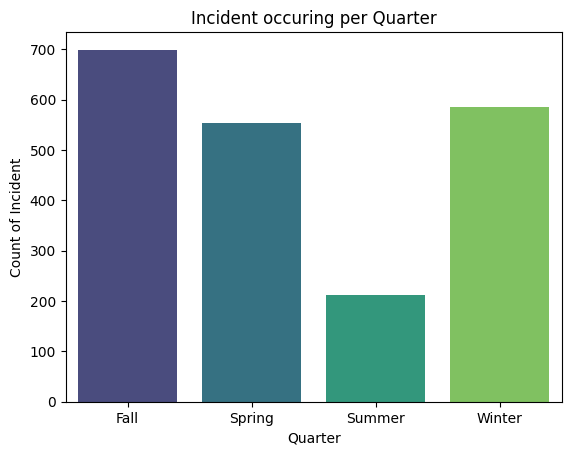

In [22]:
df1_inc_final=df_incident.groupby(['Quarter']).count()
sns.barplot(x='Quarter', y='Incident_ID', hue='Quarter', data=df1_inc_final, palette='viridis', dodge=False, legend=False)
plt.title('Incident occuring per Quarter')
plt.xlabel('Quarter')
plt.ylabel('Count of Incident')
plt.show()

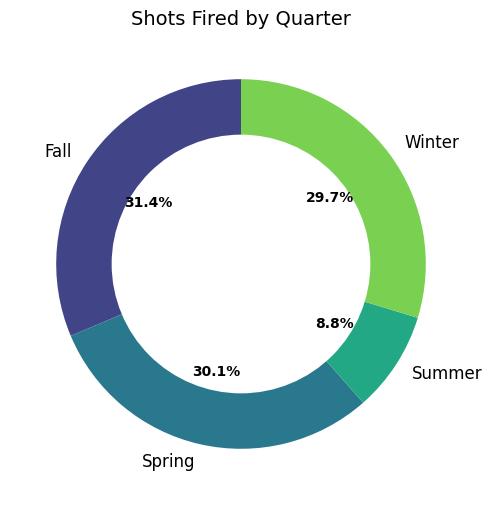

In [23]:
red_fed = df_incident.groupby('Quarter').count()[['Shots_Fired']]
red_fed = red_fed.reset_index()
plt.figure(figsize=(8, 6))
wedges, texts, autotexts = plt.pie(red_fed['Shots_Fired'], labels=red_fed['Quarter'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis', len(red_fed['Quarter'])))
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)
plt.setp(autotexts, size=10, weight="bold")
plt.setp(texts, size=12)
plt.title('Shots Fired by Quarter', fontsize=14)
plt.show()

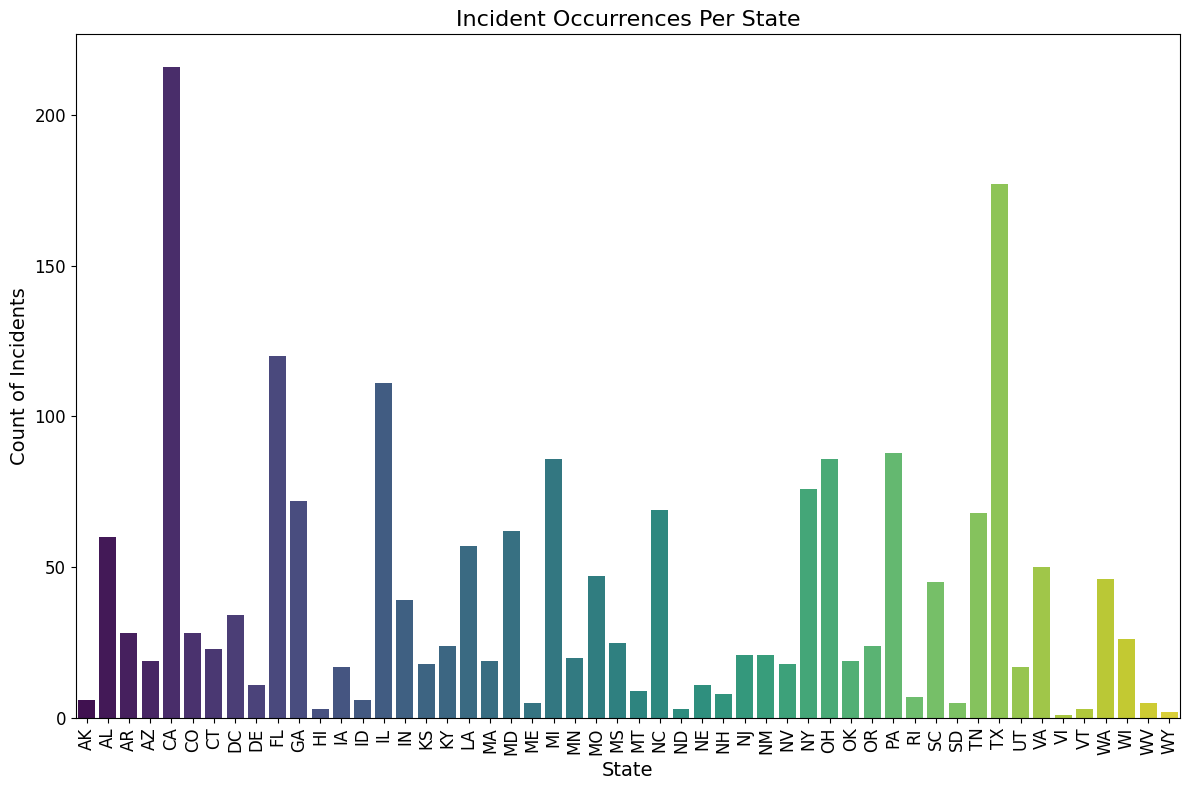

In [24]:
df2_inc_final=df_incident.groupby(['State']).count()
plt.figure(figsize=(12, 8))
sns.barplot(x='State', y='Incident_ID', hue='State', data=df2_inc_final, palette='viridis', dodge=False, legend=False)
plt.title('Incident Occurrences Per State', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Count of Incidents', fontsize=14)
plt.xticks(rotation=90, fontsize=12) 
plt.yticks(fontsize=12)  
plt.tight_layout()
plt.show()

In [25]:
df3_inc_final = df_incident[['State', 'Active_Shooter_FBI']]
image = px.scatter_geo(df3_inc_final, locations='State', locationmode='USA-states', color='Active_Shooter_FBI',  hover_name='State', 
                       title='Active Shooter present in US States', color_discrete_map={'Yes': 'green', 'No': 'red'})
image.update_layout(geo=dict(scope='usa', showland=True, landcolor="rgb(240, 240, 240)"))
image.show()

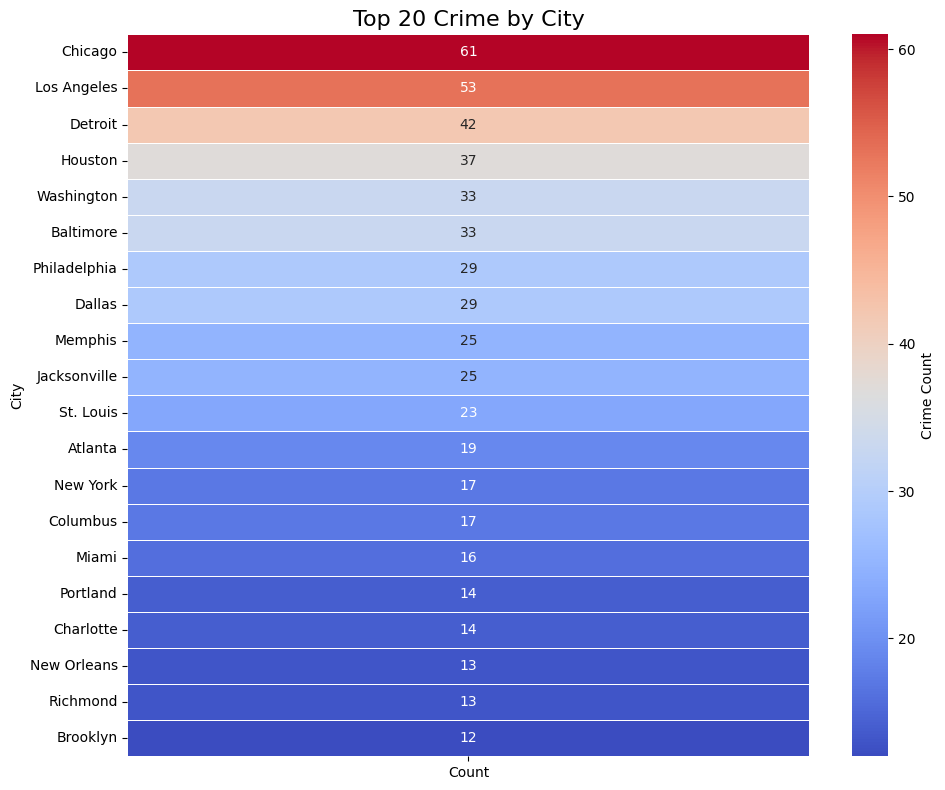

In [26]:
df4_inc_final = df_incident['City'].value_counts().head(20).reset_index()
df4_inc_final.columns = ['City', 'Count']
heatmap_data =df4_inc_final.set_index('City')
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='coolwarm', linewidths=0.5, cbar_kws={'label': 'Crime Count'})
plt.title('Top 20 Crime by City', fontsize=16)
plt.tight_layout()
plt.show()

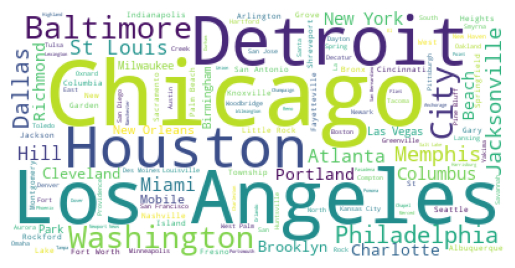

In [27]:
df5_inc_final = ' '.join(df_incident['City'])
wordcloud = WordCloud(background_color='white').generate(df5_inc_final)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [28]:
df7_inc_final = df_incident[['State', 'School_Level']]
fig = px.scatter_geo(df7_inc_final, locations="State", locationmode="USA-states", color="School_Level", hover_name="State", title="State wise crime at School Level",)
fig.update_layout(geo=dict(scope="usa", showland=True, landcolor="rgb(240, 240, 240)"))
fig.show()

C:\Users\Parag Chittora\AppData\Local\Temp\ipykernel_7456\3673799178.py:5: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



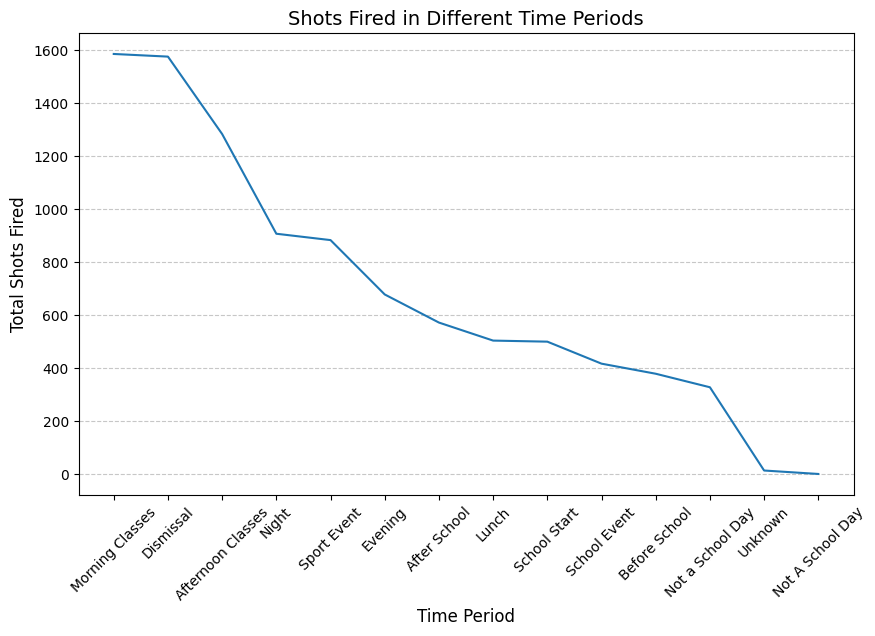

In [29]:
df_incident['Shots_Fired'] = pd.to_numeric(df_incident['Shots_Fired'], errors='coerce')
shots_by_time = df_incident.groupby('Time_Period')['Shots_Fired'].sum().reset_index()
shots_by_time = shots_by_time.sort_values(by='Shots_Fired', ascending=False)
plt.figure(figsize=(10, 6))
sns.lineplot(x='Time_Period', y='Shots_Fired', data=shots_by_time, palette="orange")
plt.title('Shots Fired in Different Time Periods', fontsize=14)
plt.xlabel('Time Period', fontsize=12)
plt.ylabel('Total Shots Fired', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

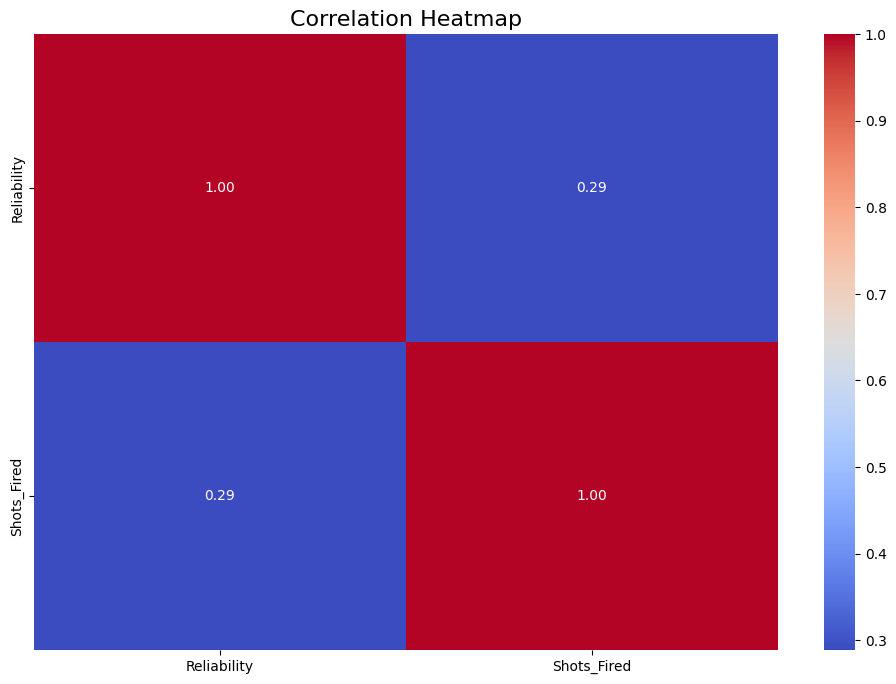

In [30]:
numerical_data = df_incident.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

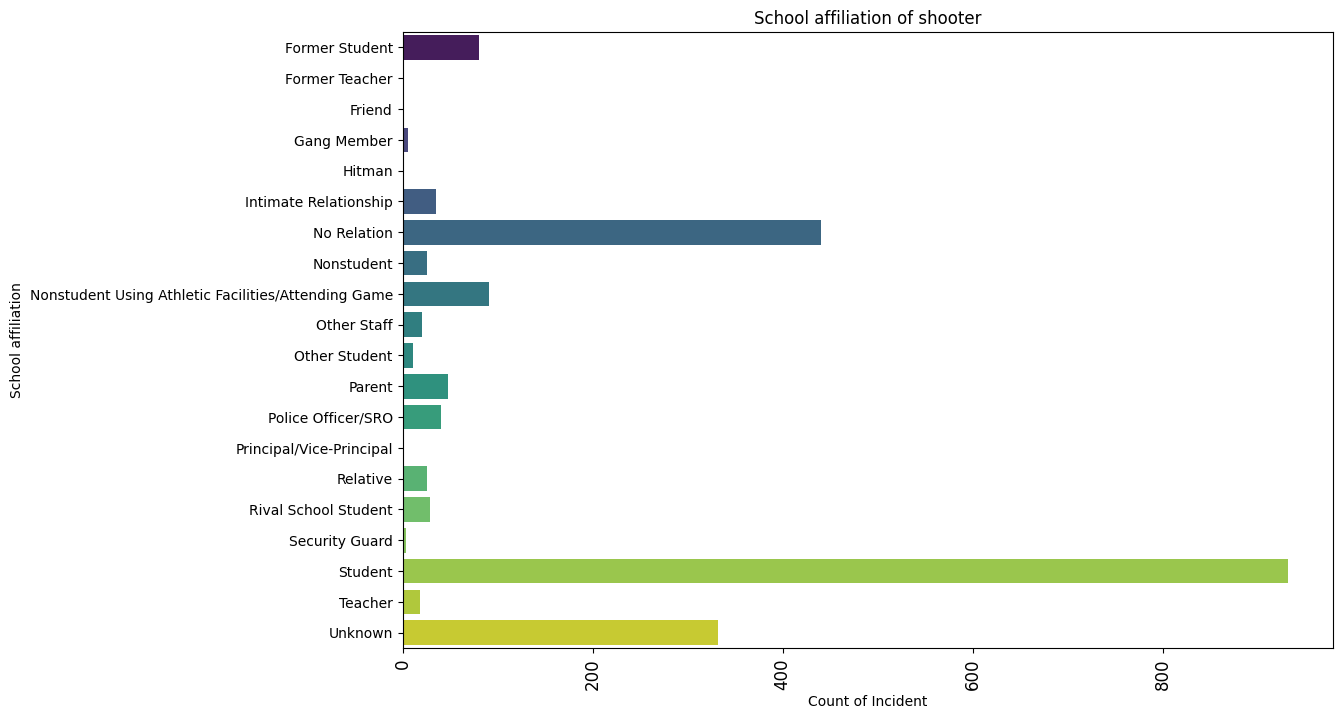

In [33]:
df4_sh_final = df_shooter.groupby('schoolaffiliation')['incidentid'].count()
df4_sh_final = df4_sh_final.reset_index()
plt.figure(figsize=(12, 8))
sns.barplot(x='incidentid', y='schoolaffiliation', hue='schoolaffiliation', data=df4_sh_final, palette='viridis', dodge=False, legend=False)
plt.title('School affiliation of shooter')
plt.xlabel('Count of Incident')
plt.xticks(rotation=90, fontsize=12) 
plt.ylabel('School affiliation')
plt.show()

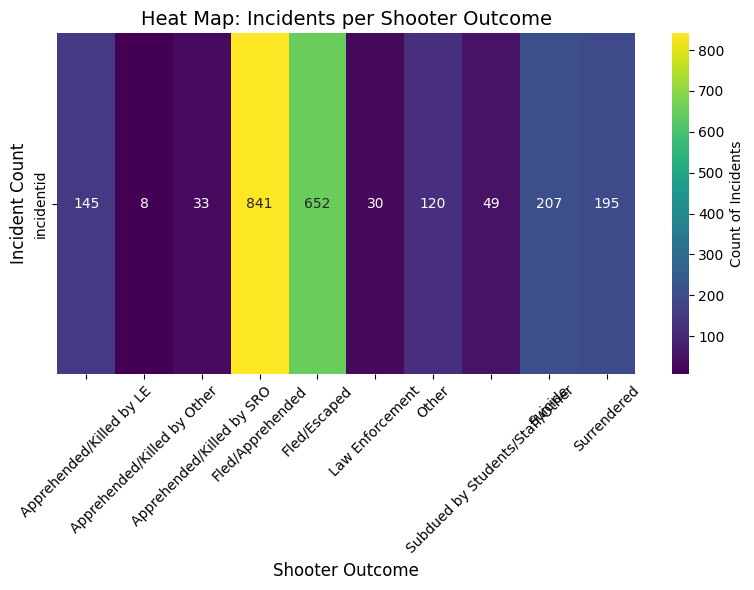

In [34]:
df_shooter['shooteroutcome'] = df_shooter['shooteroutcome'].replace('Attempted Suicide', 'Suicide')
df_shooter['shooteroutcome'] = df_shooter['shooteroutcome'].replace('Unknown', 'Other')
df2_sh_final = df_shooter.groupby('shooteroutcome')['incidentid'].count()
df2_sh_final = df2_sh_final.reset_index()
plt.figure(figsize=(8, 6))
heatmap_data = df2_sh_final.set_index('shooteroutcome').T
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="viridis", cbar_kws={'label': 'Count of Incidents'})
plt.title('Heat Map: Incidents per Shooter Outcome', fontsize=14)
plt.xlabel('Shooter Outcome', fontsize=12)
plt.ylabel('Incident Count', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

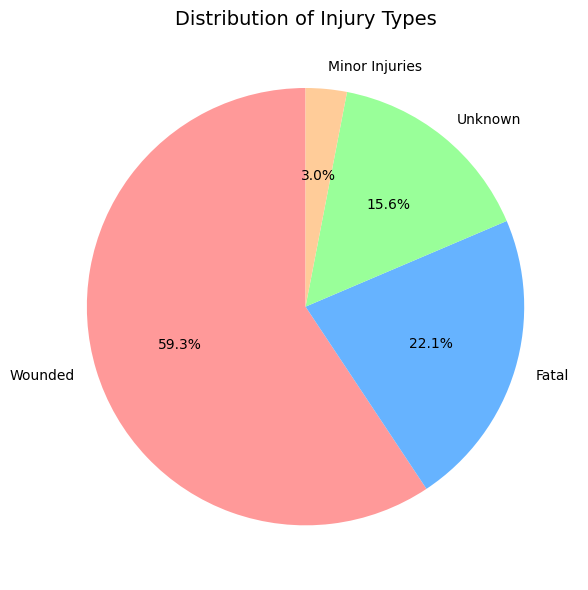

In [35]:
injury_counts = df_victim['injury'].value_counts(dropna=False).reset_index()
injury_counts.columns = ['Injury Type', 'Count']
injury_counts['Injury Type'] = injury_counts['Injury Type'].fillna('Unknown')
custom_colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#C2C2F0']
plt.figure(figsize=(8, 6))
plt.pie(
    injury_counts['Count'], 
    labels=injury_counts['Injury Type'], 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=custom_colors[:len(injury_counts)],
    textprops={'fontsize': 10}
)
plt.title('Distribution of Injury Types', fontsize=14)
plt.tight_layout()
plt.show()

In [36]:
df_weapon['weapontype'] = df_weapon['weapontype'].replace('Mulitiple Handguns', 'Multiple Handguns')
df_weapon['weapontype'] = df_weapon['weapontype'].replace('Multiple Unknown', 'Unknown')
df_weapon['weapontype'] = df_weapon['weapontype'].replace('Rifle ', 'Rifle')
df_weapon['weapontype'] = df_weapon['weapontype'].replace('No Data', 'Other')
df_weapon['weapontype'] = df_weapon['weapontype'].replace('Unknown', 'Other')

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Handgun'),
  Text(1, 0, 'Multiple Handguns'),
  Text(2, 0, 'Multiple Rifles'),
  Text(3, 0, 'Other'),
  Text(4, 0, 'Rifle'),
  Text(5, 0, 'Shotgun')])

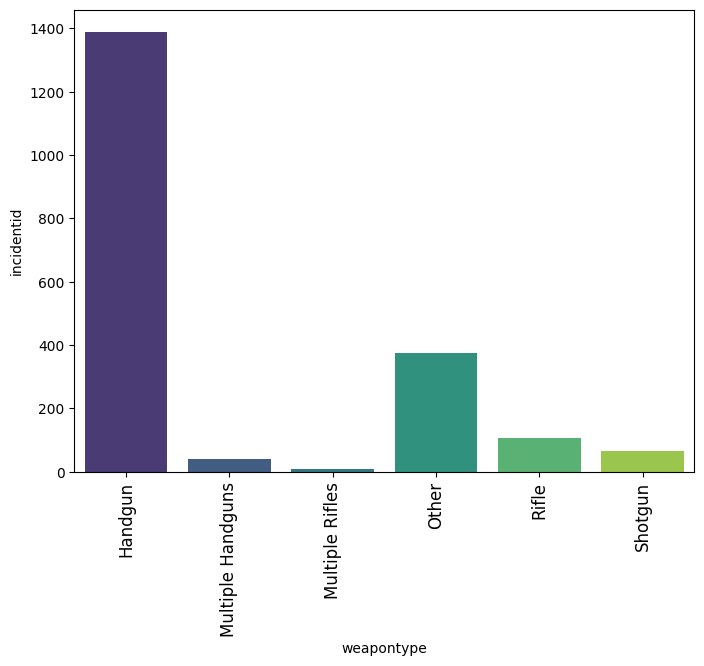

In [37]:
gender_purchase = df_weapon.groupby('weapontype').count()[['incidentid']].reset_index()
plt.figure(figsize=(8, 6), dpi=100)
sns.barplot(data=gender_purchase, x='weapontype', y='incidentid', hue = 'weapontype', palette='viridis', dodge=False)
plt.xticks(rotation=90, fontsize=12)

<bound method DataFrame.info of         Incident_ID  Reliability
0     20220601CAULL            4
1     20220531LAMON            4
4     20220530CAHEL            4
5     20220529ILDAC            4
35    20220526SCMEG            4
...             ...          ...
4502  19700323CADAL            2
4506  19700206OHJOC            2
4507  19700105DCUNW            2
4508  19700105DCSOW            3
4509  19700105DCHIW            3

[2060 rows x 2 columns]>
             Incident_ID
Reliability             
1                    107
2                    937
3                    424
4                    527
5                     65
Null values 0


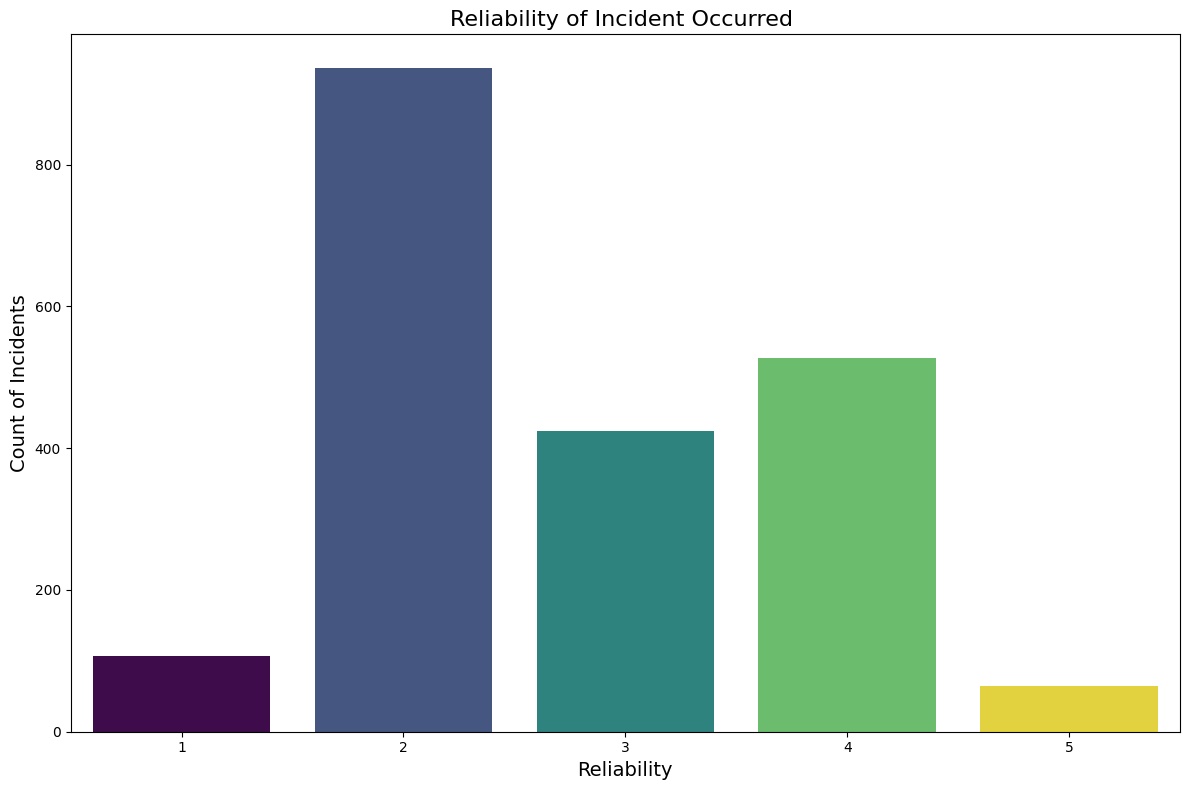

In [38]:
df4 = df_final[['Incident_ID', 'Reliability']]
df4_remove_duplicate= df4.drop_duplicates(keep = 'first')
print(df4_remove_duplicate.info)
df4_final=df4_remove_duplicate.groupby(['Reliability']).count()
print(df4_final)
print("Null values", + df4_remove_duplicate['Reliability'].isnull().sum())
plt.figure(figsize=(12, 8))
sns.barplot(x='Reliability', y='Incident_ID', hue='Reliability', data=df4_final, palette='viridis', dodge=False, legend=False)
plt.title('Reliability of Incident Occurred ', fontsize=16)
plt.xlabel('Reliability', fontsize=14)
plt.ylabel('Count of Incidents', fontsize=14) 
plt.tight_layout()
plt.show()

In [39]:
df5 = df_final[['Incident_ID', 'Date']]
df5_remove_duplicate= df5.drop_duplicates(keep = 'first')
df5_remove_duplicate.head()

Incident_ID        Date
0   20220601CAULL  01-06-2022
1   20220531LAMON  31-05-2022
4   20220530CAHEL  30-05-2022
5   20220529ILDAC  29-05-2022
35  20220526SCMEG  26-05-2022

In [40]:
df5_remove_duplicate = df5_remove_duplicate.copy()
df5_remove_duplicate['Date'] = pd.to_datetime(df5_remove_duplicate['Date'], format="%d-%m-%Y")
df5_remove_duplicate['Month'] = df5_remove_duplicate['Date'].dt.month
df5_remove_duplicate['Year'] = df5_remove_duplicate['Date'].dt.year

In [41]:
df_year=df5_remove_duplicate.groupby(['Year']).count()
df_year

Incident_ID  Date  Month
Year                          
1970           20    20     20
1971           21    21     21
1972           18    18     18
1973           18    18     18
1974           16    16     16
1975           14    14     14
1976           11    11     11
1977           16    16     16
1978           16    16     16
1979           16    16     16
1980           20    20     20
1981           17    17     17
1982           18    18     18
1983           25    25     25
1984           25    25     25
1985           20    20     20
1986           16    16     16
1987           25    25     25
1988           38    38     38
1989           19    19     19
1990           18    18     18
1991           32    32     32
1992           33    33     33
1993           47    47     47
1994           39    39     39
1995           22    22     22
1996           21    21     21
1997           26    26     26
1998           28    28     28
1999           22    22     22
2000           29    29     29
2001           25    25     25
2002           19    19     19
2003           32    32     32
2004           35    35     35
2005           47    47     47
2006           59    59     59
2007           44    44     44
2008           35    35     35
2009           31    31     31
2010           15    15     15
2011           16    16     16
2012           20    20     20
2013           34    34     34
2014           46    46     46
2015           40    40     40
2016           50    50     50
2017           58    58     58
2018          118   118    118
2019          119   119    119
2020          114   114    114
2021          250   250    250
2022          147   147    147

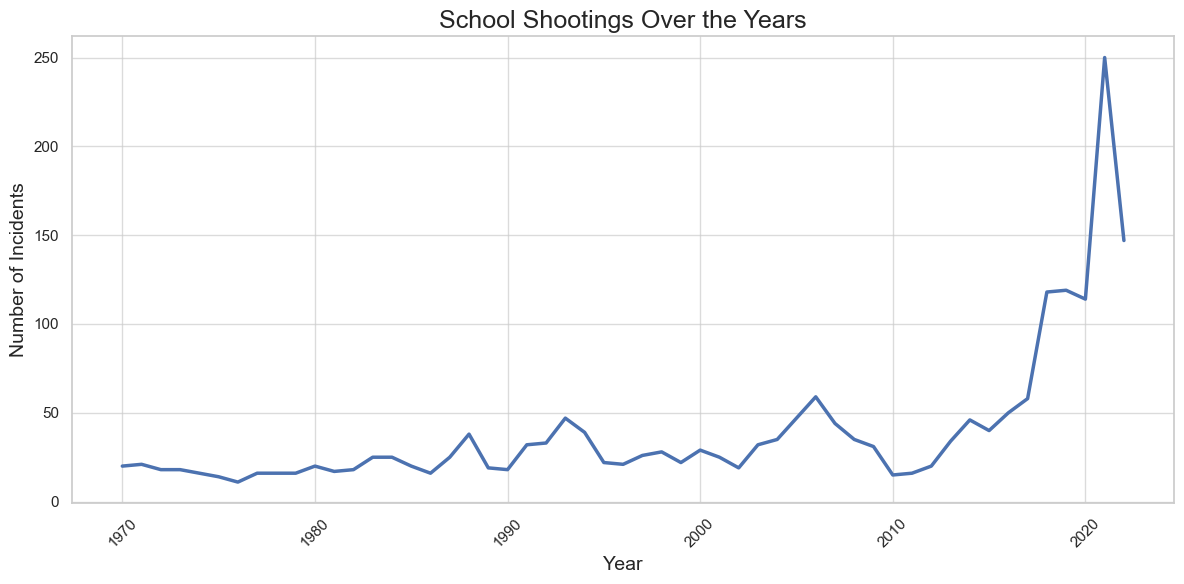

In [42]:
df_year['Year'] = pd.to_datetime(df_year['Date'], dayfirst=True, errors='coerce').dt.year
year_counts = df5_remove_duplicate['Year'].value_counts().sort_index()
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(x=year_counts.index, y=year_counts.values, linewidth=2.5, color='b')
plt.title("School Shootings Over the Years", fontsize=18)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Incidents", fontsize=14)
plt.xticks(rotation=45)
plt.grid(visible=True, linestyle='-', alpha=0.7)
plt.tight_layout()
plt.show()

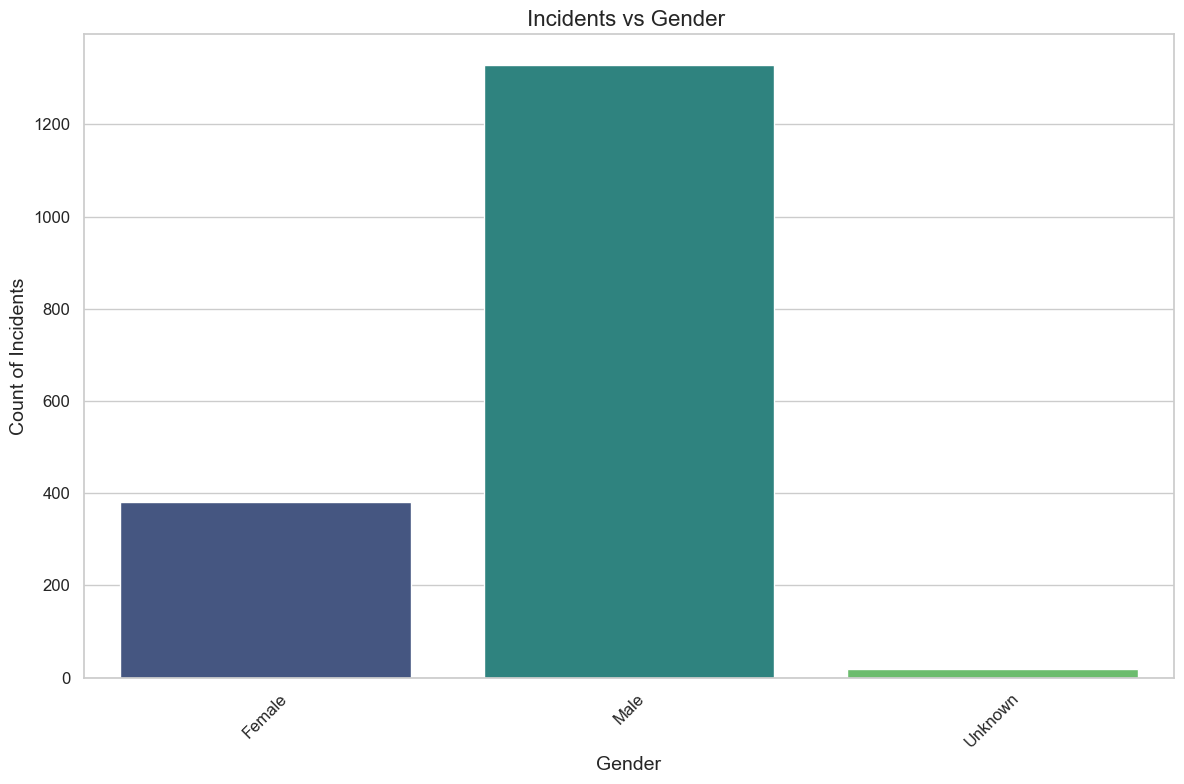

In [43]:
df4 = df_final[['Incident_ID', 'gender_y']]
df4_remove_duplicate= df4.drop_duplicates(keep = 'first')
df4_final=df4_remove_duplicate.groupby(['gender_y']).count()

plt.figure(figsize=(12, 8))
sns.barplot(x='gender_y', y='Incident_ID', hue='gender_y', data=df4_final, palette='viridis', dodge=False, legend=False)

plt.title('Incidents vs Gender ', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count of Incidents', fontsize=14)
plt.xticks(rotation=45, fontsize=12) 
plt.yticks(fontsize=12)  

plt.tight_layout()
plt.show()

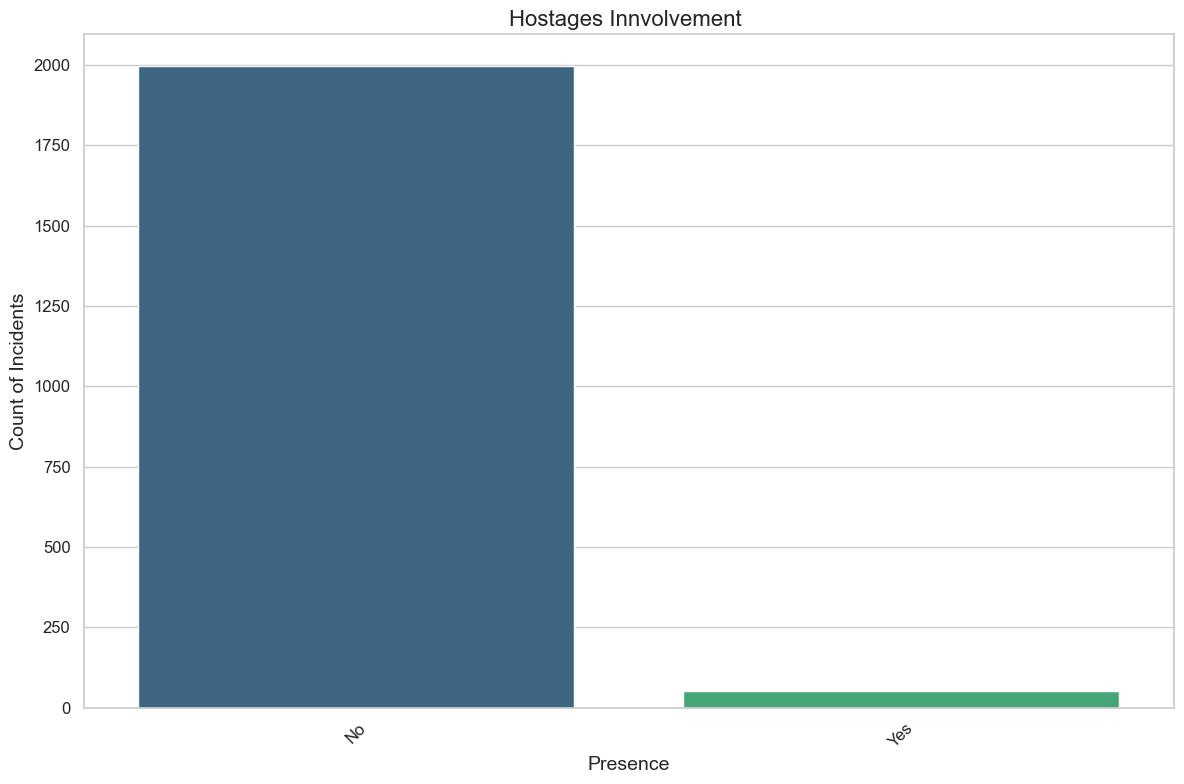

In [44]:
df4 = df_final[['Incident_ID', 'Hostages']]
df4_remove_duplicate= df4.drop_duplicates(keep = 'first')
df4_final=df4_remove_duplicate.groupby(['Hostages']).count().head(20)
plt.figure(figsize=(12, 8))
sns.barplot(x='Hostages', y='Incident_ID', hue='Hostages', data=df4_final, palette='viridis', dodge=False, legend=False)
plt.title('Hostages Innvolvement ', fontsize=16)
plt.xlabel('Presence', fontsize=14)
plt.ylabel('Count of Incidents', fontsize=14)
plt.xticks(rotation=45, fontsize=12) 
plt.yticks(fontsize=12)  
plt.tight_layout()
plt.show()

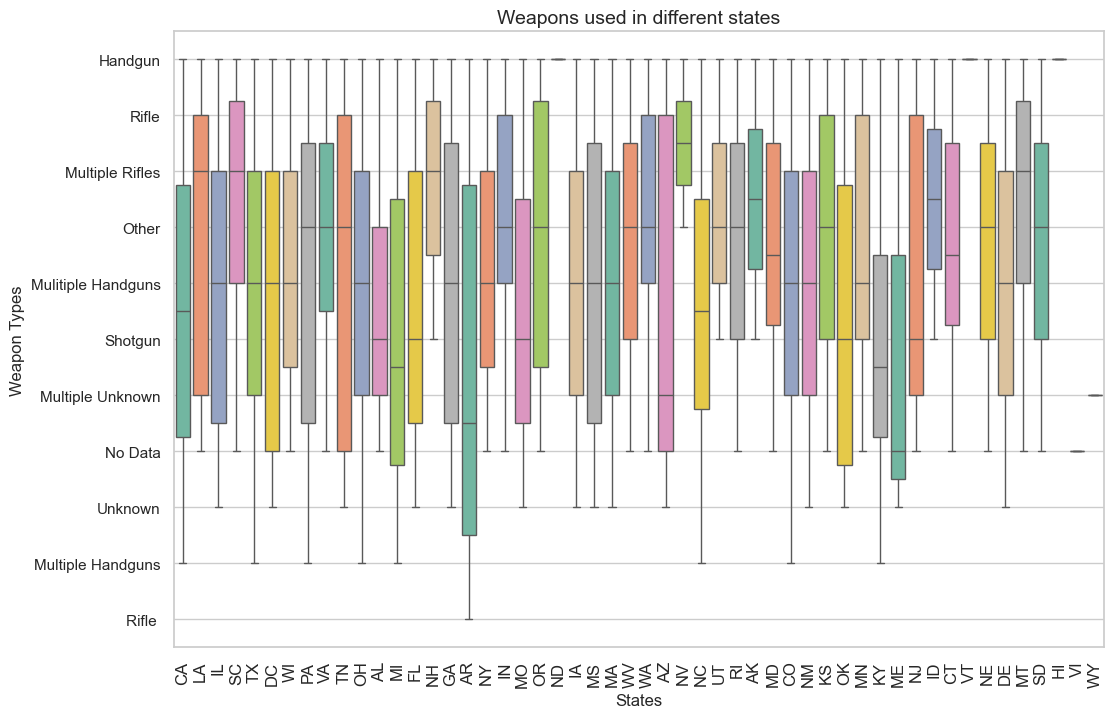

In [45]:
df_new1=df_final[['State','weapontype']].drop_duplicates(keep = 'first')
plt.figure(figsize=(12,8))
sns.boxplot(x='State', y='weapontype', data=df_new1, hue='State', palette='Set2', legend=False)
plt.title('Weapons used in different states', fontsize=14)
plt.xlabel('States', fontsize=12)
plt.xticks(rotation=90, fontsize=12)
plt.ylabel('Weapon Types', fontsize=12)
plt.show()

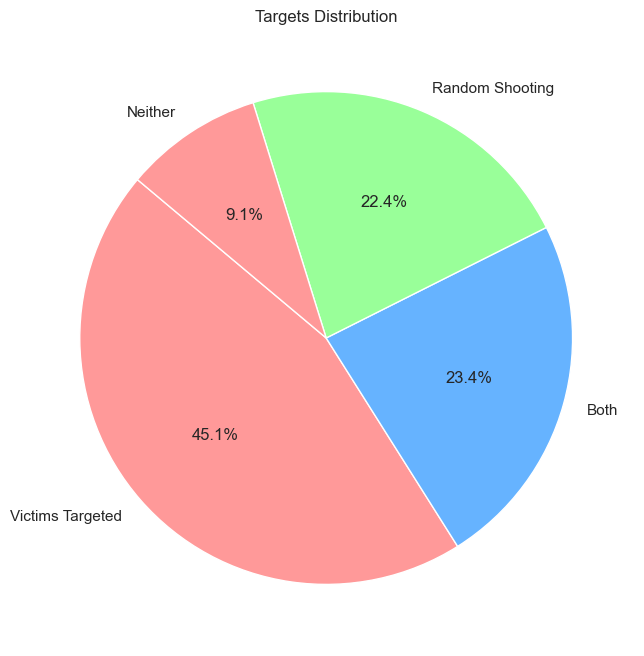

In [46]:
df_new2=df_final['Targets']
df_new2
summary_counts = df_new2.value_counts()
plt.figure(figsize=(8, 8))
plt.pie(summary_counts, labels=summary_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Targets Distribution')
plt.show()